In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-airline-sentiment/database.sqlite
/kaggle/input/twitter-airline-sentiment/Tweets.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


train = pd.read_csv("/kaggle/input/twitter-airline-sentiment/Tweets.csv")
train.head()

train = train[["airline_sentiment","text"]]



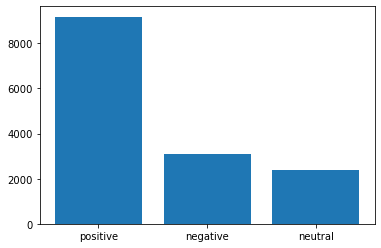

In [3]:
countSentiment=train.groupby('airline_sentiment').count()
y=countSentiment["text"]
x=list(set(train["airline_sentiment"]))
plt.bar(x,y)
plt.show()

In [4]:
tfidf=TfidfVectorizer()
tfidf_Text= tfidf.fit_transform(train["text"])
X_train, X_test, y_train, y_test = train_test_split(tfidf_Text,train['airline_sentiment'], test_size=0.3, random_state=123)
model = MultinomialNB().fit(X_train, y_train)
predicted= model.predict(X_test)
print("Accuracy of MultinomialNB using TF-IDF:",metrics.accuracy_score(y_test, predicted))
tfidf_score=metrics.accuracy_score(y_test, predicted)

Accuracy of MultinomialNB using TF-IDF: 0.6755464480874317


In [5]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predicted= logisticRegr.predict(X_test)
print("Accuracy of logistic regression:",metrics.accuracy_score(y_test, predicted))
logistic_score=metrics.accuracy_score(y_test, predicted)

Accuracy of logistic regression: 0.8107923497267759


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
predicted= knn.predict(X_test)
print("Accuracy of knn regression:",metrics.accuracy_score(y_test, predicted))
knn_score=metrics.accuracy_score(y_test, predicted)

Accuracy of knn regression: 0.7142531876138434


In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [9]:
y_pred= classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
svm_score = metrics.accuracy_score(y_test, y_pred)



In [11]:
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=6, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train) 
y_pred=clf_gini.predict(X_test)

In [12]:
DTC_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy obtained for Decision Tree classsifier: " , DTC_score)

Accuracy obtained for Decision Tree classsifier:  0.6960382513661202


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [14]:
RF_score=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_score)

Accuracy: 0.7511384335154827


In [15]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [17]:
y_pred= classifier.predict(X_test)

In [25]:
ada_score=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",ada_score)

Accuracy: 0.7511384335154827


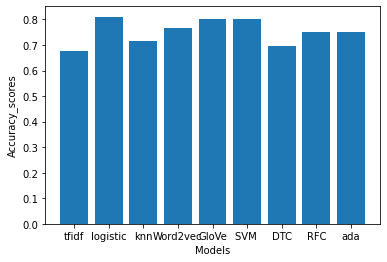

In [26]:
y=[tfidf_score,logistic_score,knn_score,0.7657,0.8023,svm_score,DTC_score,RF_score,ada_score]
x=["tfidf","logistic","knn","Word2vec","GloVe","SVM ","DTC","RFC","ada"]
plt.xlabel("Models")
plt.ylabel("Accuracy_scores")
plt.bar(x,y)
plt.show()